<a href="https://colab.research.google.com/github/marcellamj/Case_Airbnb/blob/main/AD2_Projeto_Airbnb_Marcella_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 3 - Case Airbnb**

**Escola**: SoulCode Academy

**Curso**: Bootcamp Analista de Dados - Martech - AD2

**Aluna**: Marcella Macedo

## **Dados**

Os dados foram extraídos do Kaggle, que apesar de abranger os preços do Airbnb na Europa, nesse dataframe se relacionam apenas a reservas em Amsterdam para 2 pessoas do dia 20 a 22 de agosto (Ter-Qui). Os dados de fim de semana estão presentes em outro dataframe que não será analisado neste projeto.

Fontes:
* https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

* https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#sec3

* https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

* https://www.mirror.co.uk/lifestyle/travel/europe-short-haul/take-sneak-peek-inside-hotel-10126339

* https://plotly.com/python/histograms/

* https://plotly.com/python/bubble-maps/

**Pergunta de negócio:**

Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

**Nível - Tratamento e Análise**
* Verificar todos os passos da estratégia geral de análise de dados;
* Executar o que for necessário;
* Todos os passos devem ser comentados;
* Realizar no mínimo 3 análises apenas numéricas;
* Realizar plotagens para no mínimo 3 análises;
* Chegar a uma conclusão de sua análise;

**Nivel Infra**
* O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)
* O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado)
* O Arquivo original e tratado deve ser salvo em MongoDB Atlas em coleções diferentes

**O que será analisado:**
* Pontualidade;
* Organização de código;
* Atendimento aos requisitos;
* Capacidade de Pesquisa e Autonomia;
* Aplicação da Estratégia Geral de Análise de Dados;

### **Legenda de Dados**

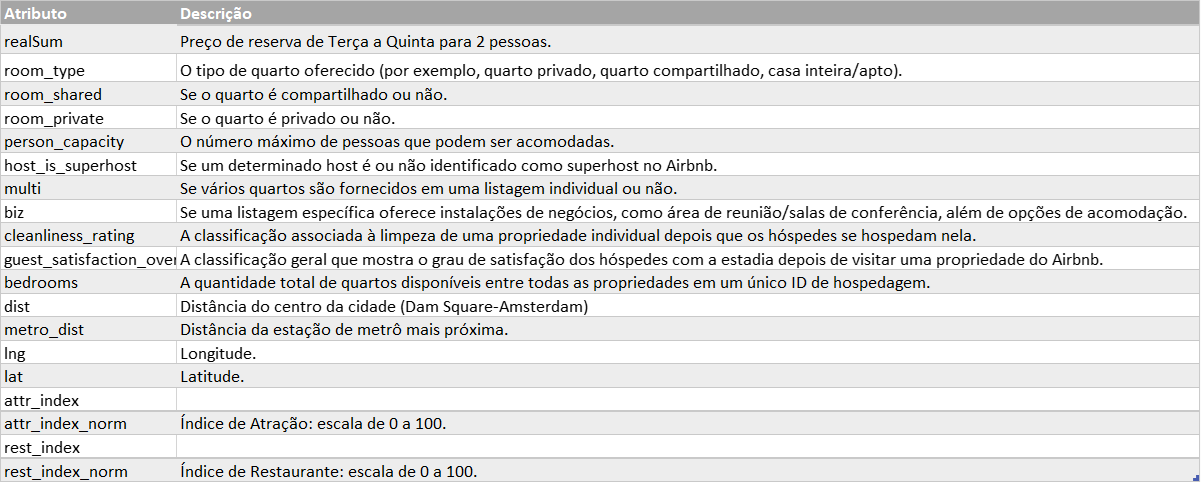

### **Problema de negócio**

**5W**

* Quem pode se beneficiar dessa análise?
* O que leva uma pessoa a reservar um local?
* O que chama mais atenção: Distância do centro, do metrô, bons locais por perto?
* Que fatores afetam os preços do Airbnb?
* Qual o nível de satisfação dos clientes dependendo do tipo de quarto ou taxa de limpeza?
* Como os proprietários podem definir preços competitivos?


**Análise de Preços**: relação entre o preço e atributos como tipo de quarto, capacidade do quarto, status do anfitrião (superhost ou não), classificação de limpeza, distância até o metrô, distância até atrações/restaurantes.

**Análise Geográfica**: coordenadas de long e lat para identificar áreas ou bairros populares com preços médios mais altos ou mais baixos.

**Análise do Impacto do Superhost**: importância do status de superhost para atrair hóspedes e definir preços competitivos.

**Análise de Otimização de Negócios**: recomendações aos proprietários de negócios sobre como otimizar suas listagens para aumentar as reservas e definir preços competitivos. Atributos que possuem uma correlação mais forte com a satisfação dos hóspedes.

## **Instalações e Importações**

* **Bibliotecas**

In [2]:
# Acessar GCP
!pip install gcsfs

#Biblioteca de validação de dados
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 3.9 MB/s eta 0:00:00


In [3]:
#Bibliotecas de sistema operacional, análise de dados, arrays e funções, validação de dados, dataviz com Matplotlitb e outros gráficos complexos:
import os
import pandas as pd
import numpy as np
import pandera as pa
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt

# Pegar arquivo pelo google drive
from google.colab import drive

# Pegar o arquivo pelo bucket do GCP
from  google.cloud import storage

In [4]:
import warnings
warnings.filterwarnings("ignore")

# **EXTRAÇÃO**

## **Google Drive**

In [5]:
# Acesso ao Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Acesso ao arquivo
pathdrive = '/content/drive/MyDrive/SoulCode Analista de Dados/Projeto Airbnb/amsterdam_weekdays.csv'
dfdrive = pd.read_csv(pathdrive)

## **GCP**

In [7]:
# Acesso a sua GCP pela Chave de Conta de Serviço
serviceAccount = '/content/projetoooo-390016-b1267b930665.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [10]:
# Acesso ao arquivo da GCP
# Nome da bucket: duquezinho05
# Nome do arquivo: airbnb.csv
# Caminho da bucket: duquezinho05/bruto/amsterdam_weekdays.csv

client = storage.Client()
bucket = client.get_bucket('duquezinho05')
bucket.blob('airbnb.csv')
pathgcp = 'gs://duquezinho05/bruto/amsterdam_weekdays.csv'

In [11]:
df=pd.read_csv(pathgcp)

In [12]:
#Linhas aleatórias do dataframe
df.sample(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
934,934,737.234317,Entire home/apt,False,False,4.0,False,0,0,10.0,99.0,3,2.403629,1.851083,214.727293,11.369953,265.289903,18.485782,4.86005,52.36565
41,41,614.440044,Private room,False,True,4.0,False,0,1,9.0,96.0,1,0.495828,0.332742,717.446444,37.989266,848.404842,59.118070,4.89969,52.37513
663,663,356.431467,Entire home/apt,False,False,2.0,False,0,0,10.0,96.0,0,3.510244,0.872300,109.706087,5.809010,136.128217,9.485610,4.91960,52.40030
65,65,330.419703,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,2.564052,1.248153,167.554160,8.872104,209.167773,14.575111,4.85619,52.37780
637,637,624.282333,Entire home/apt,False,False,2.0,True,1,0,10.0,97.0,1,1.552579,1.069301,406.374097,21.517778,567.308755,39.530890,4.87621,52.36386


In [13]:
#Informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [14]:
#Primeiro backup do df
dfback = df.copy()

In [15]:
# Coordenadas de Amsterdam - Local da Análise
lat_amsterdam = 52.3667
lon_amsterdam = 4.8945

data = {'lat': [lat_amsterdam], 'lon': [lon_amsterdam]}
dfamst = pd.DataFrame(data)
fig = px.scatter_mapbox(dfamst, lat='lat', lon='lon', zoom=12)

fig.update_layout(mapbox_style='open-street-map',
    title_text='Mapa de Amsterdam',
    title_font_size=20,
    title_x=0.5,
    title_y=0.95)
fig.show()


# **TRANSFORMAÇÃO**

**Atributos**

- custo
- tipo_quarto
- capacidade
- superhost
- multi
- negócio
- limpeza
- satisfacao
- quartos
- dist_centro
- dist_metro
- ind_atracao_norm
- ind_rest_norm
- lng
- lat

## **Normalização**

In [16]:
#verifica dados nulos, ausentes
df.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [17]:
#verifica inconsistência, se algum registro é compartilhado e privado ao mesmo tempo
compartilhado = df.room_shared == True
privado = df.room_private == True

In [18]:
df.loc[compartilhado & privado]

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat


## **Tradução**

In [19]:
# Tradução das colunas

df.rename(columns={'realSum': 'custo',
                   'room_type': 'tipo_quarto',
                   'person_capacity': 'capacidade',
                   'host_is_superhost': 'superhost',
                   'biz': 'negócio',
                   'cleanliness_rating': 'limpeza',
                   'guest_satisfaction_overall': 'satisfacao',
                   'bedrooms': 'quartos',
                   'dist': 'dist_centro',
                   'metro_dist': 'dist_metro',
                   'attr_index': 'ind_atracao',
                   'attr_index_norm': 'ind_atracao_norm',
                   'rest_index': 'ind_rest',
                   'rest_index_norm': 'ind_rest_norm',
                   'lng': 'lon'
                   },
                   inplace = True)

In [20]:
#check da tradução
df.sample(2)

,Unnamed: 0,custo,tipo_quarto,room_shared,room_private,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao,ind_atracao_norm,ind_rest,ind_rest_norm,lon,lat
870,870,258.008577,Private room,False,True,2.0,True,0,0,10.0,98.0,1,1.885696,0.289653,247.250573,13.092082,303.503340,21.148549,4.91192,52.36080
384,384,344.245776,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.280446,0.273396,674.746584,35.728280,794.482351,55.360673,4.89682,52.37215


In [21]:
# Check dos valores presentes em tipo_quarto
df['tipo_quarto'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [22]:
# Tradução dos valores de tipo_quarto

df.loc[df.tipo_quarto == 'Entire home/apt', ['tipo_quarto']] = 'CASA/APT INTEIRO'
df.loc[df.tipo_quarto == 'Private room',    ['tipo_quarto']] = 'QT PRIVADO'
df.loc[df.tipo_quarto == 'Shared room',     ['tipo_quarto']] = 'QT COMPARTILHADO'

In [23]:
# Check dos valores traduzidos
print(sorted(pd.unique(df['tipo_quarto'])))

['CASA/APT INTEIRO', 'QT COMPARTILHADO', 'QT PRIVADO']


In [24]:
# Contagem de valores em cada atributo
df.count()

Unnamed: 0          1103
custo               1103
tipo_quarto         1103
room_shared         1103
room_private        1103
capacidade          1103
superhost           1103
multi               1103
negócio             1103
limpeza             1103
satisfacao          1103
quartos             1103
dist_centro         1103
dist_metro          1103
ind_atracao         1103
ind_atracao_norm    1103
ind_rest            1103
ind_rest_norm       1103
lon                 1103
lat                 1103
dtype: int64

In [25]:
# Informação dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1103 non-null   int64  
 1   custo             1103 non-null   float64
 2   tipo_quarto       1103 non-null   object 
 3   room_shared       1103 non-null   bool   
 4   room_private      1103 non-null   bool   
 5   capacidade        1103 non-null   float64
 6   superhost         1103 non-null   bool   
 7   multi             1103 non-null   int64  
 8   negócio           1103 non-null   int64  
 9   limpeza           1103 non-null   float64
 10  satisfacao        1103 non-null   float64
 11  quartos           1103 non-null   int64  
 12  dist_centro       1103 non-null   float64
 13  dist_metro        1103 non-null   float64
 14  ind_atracao       1103 non-null   float64
 15  ind_atracao_norm  1103 non-null   float64
 16  ind_rest          1103 non-null   float64


In [26]:
#Segundo backup do df
dfback2=df.copy()

## **Limpeza**

In [27]:
# Excluir colunas que não serão utilizadas
df.drop(['Unnamed: 0',
         'room_shared',
         'room_private',
         'ind_atracao',
         'ind_rest'
         ],axis=1, inplace=True)

In [28]:
df.sample(3)

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
25,217.702060,QT PRIVADO,2.0,False,1,0,8.0,93.0,1,4.180815,2.808438,4.938749,8.205662,4.89375,52.41081
87,221.217163,QT PRIVADO,2.0,False,0,0,9.0,94.0,1,6.058989,1.748167,4.127455,6.757418,4.80823,52.35690
1040,509.924308,CASA/APT INTEIRO,2.0,False,0,0,9.0,90.0,1,2.818626,1.518472,9.501642,15.384278,4.85394,52.36503


In [29]:
# Arredondar colunas float
df[['custo',
    'dist_centro',
    'dist_metro',
    'ind_atracao_norm',
    'ind_rest_norm']] = df[['custo', 'dist_centro','dist_metro','ind_atracao_norm','ind_rest_norm']].round(2)

In [30]:
print(sorted(pd.unique(df['quartos'])))

[0, 1, 2, 3, 4, 5]


In [31]:
print(sorted(pd.unique(df['capacidade'])))

[2.0, 3.0, 4.0, 5.0, 6.0]


In [32]:
print(sorted(pd.unique(df['limpeza'])))

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [33]:
print(sorted(pd.unique(df['satisfacao'])))

[20.0, 47.0, 60.0, 65.0, 70.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [34]:
print(sorted(pd.unique(df['ind_atracao_norm'])))

[2.17, 2.19, 2.2, 2.22, 2.23, 2.26, 2.27, 2.32, 2.33, 2.35, 2.37, 2.38, 2.39, 2.4, 2.41, 2.51, 2.52, 2.58, 2.6, 2.61, 2.62, 2.64, 2.66, 2.72, 2.78, 2.79, 2.81, 2.84, 2.87, 2.91, 2.92, 2.93, 2.96, 3.01, 3.02, 3.03, 3.05, 3.06, 3.07, 3.08, 3.09, 3.13, 3.17, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.29, 3.31, 3.35, 3.37, 3.41, 3.42, 3.44, 3.46, 3.48, 3.53, 3.54, 3.56, 3.59, 3.6, 3.61, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.71, 3.72, 3.75, 3.78, 3.79, 3.84, 3.85, 3.86, 3.87, 3.88, 3.91, 3.96, 3.98, 3.99, 4.0, 4.03, 4.06, 4.07, 4.09, 4.13, 4.16, 4.17, 4.25, 4.26, 4.28, 4.29, 4.3, 4.32, 4.33, 4.35, 4.38, 4.41, 4.47, 4.5, 4.52, 4.54, 4.55, 4.57, 4.62, 4.65, 4.71, 4.72, 4.78, 4.79, 4.81, 4.85, 4.86, 4.87, 4.88, 4.89, 4.92, 4.93, 4.94, 4.96, 4.98, 4.99, 5.01, 5.07, 5.08, 5.09, 5.11, 5.19, 5.22, 5.28, 5.29, 5.32, 5.36, 5.37, 5.38, 5.4, 5.45, 5.46, 5.49, 5.51, 5.53, 5.54, 5.62, 5.64, 5.65, 5.67, 5.68, 5.71, 5.72, 5.75, 5.76, 5.77, 5.78, 5.81, 5.82, 5.83, 5.84, 5.85, 5.86, 5.87, 5.93, 5.95, 5.96, 

## **Validação Schema**

In [35]:
df['capacidade'] = df['capacidade'].astype(int)

In [36]:
schema = pa.DataFrameSchema ({'custo': pa.Column(pa.Float),
  'tipo_quarto': pa.Column(pa.String),
  'capacidade': pa.Column(pa.Int),
  'superhost': pa.Column(pa.Bool),
  'multi': pa.Column(pa.Int),
  'negócio': pa.Column(pa.Int),
  'limpeza': pa.Column(pa.Float),
  'satisfacao': pa.Column(pa.Float),
  'quartos': pa.Column(pa.Int),
  'dist_centro': pa.Column(pa.Float),
  'dist_metro': pa.Column(pa.Float),
  'ind_atracao_norm':pa.Column(pa.Float),
  'ind_rest_norm':pa.Column(pa.Float),
  'lon':pa.Column(pa.Float),
  'lat':pa.Column(pa.Float)
   })

schema.validate(df)

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
0,194.03,QT PRIVADO,2,False,1,0,10.0,93.0,1,5.02,2.54,4.17,6.85,4.90569,52.41772
1,344.25,QT PRIVADO,4,False,0,0,8.0,85.0,1,0.49,0.24,33.42,58.34,4.90005,52.37432
2,264.10,QT PRIVADO,2,False,0,1,9.0,87.0,1,5.75,3.65,3.99,6.65,4.97512,52.36103
3,433.53,QT PRIVADO,4,False,0,1,9.0,90.0,2,0.38,0.44,26.12,60.97,4.89417,52.37663
4,485.55,QT PRIVADO,2,True,0,0,10.0,98.0,1,0.54,0.32,29.27,56.81,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,CASA/APT INTEIRO,2,False,0,0,10.0,100.0,1,2.38,1.44,9.59,15.70,4.85869,52.37677
1099,233.64,QT PRIVADO,2,False,1,0,10.0,90.0,1,4.72,0.32,5.72,9.39,4.83611,52.34910
1100,317.06,QT PRIVADO,2,False,1,0,10.0,92.0,1,0.60,0.75,23.32,43.62,4.88897,52.37798
1101,1812.86,CASA/APT INTEIRO,4,False,0,0,8.0,84.0,5,1.94,0.39,13.66,23.45,4.90688,52.35794


In [37]:
#Terceiro backup do df
dfback3=df.copy()

# **CARREGAMENTO**

In [38]:
# Google Drive

df.to_csv('/content/drive/MyDrive/SoulCode Analista de Dados/Projeto Airbnb/amsterdam_weekdays_tratado.csv',index=False)

In [39]:
# GCP - Salvar no bucket

df.to_csv('gs://duquezinho05/tratado/amsterdam_weekdays_tratado.csv', index=False)

# **Análise Exploratória de Dados**

### **Análise Descritiva**

In [40]:
# Análise estatística do dataframe
df.describe().round(1)

,custo,capacidade,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
count,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0
mean,545.0,2.8,0.3,0.1,9.5,94.4,1.3,2.8,1.1,14.4,23.8,4.9,52.4
std,417.0,1.0,0.5,0.3,0.8,6.1,0.7,2.1,0.8,10.4,16.5,0.0,0.0
min,128.9,2.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,2.2,3.6,4.8,52.3
25%,309.8,2.0,0.0,0.0,9.0,92.0,1.0,1.3,0.5,6.8,11.4,4.9,52.4
50%,430.2,2.0,0.0,0.0,10.0,96.0,1.0,2.3,0.9,11.0,18.1,4.9,52.4
75%,657.3,4.0,1.0,0.0,10.0,98.0,2.0,3.6,1.5,20.5,32.7,4.9,52.4
max,7782.9,6.0,1.0,1.0,10.0,100.0,5.0,11.2,4.4,100.0,100.0,5.0,52.4


### **Análise de Correlação**

<Axes: >

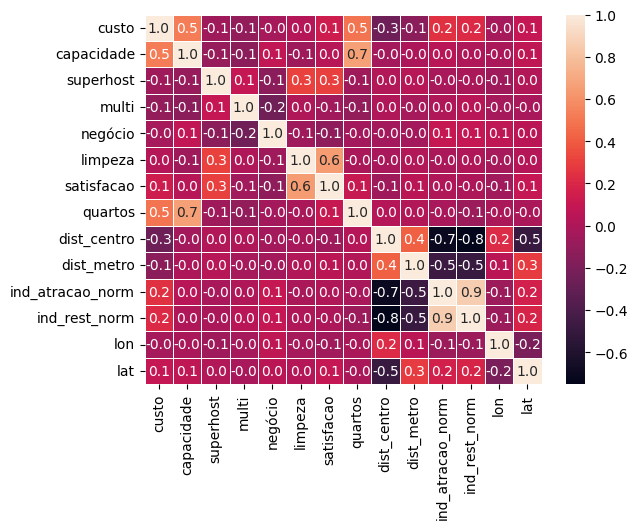

In [41]:
# Correlações
correlation = df.corr()

# Plotagem do gráfico
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

### **Grupos e Filtros**

In [42]:
# Quant de locações que são superhosts ou não
df.groupby(['superhost']).size().sort_values(ascending=False)

superhost
False    780
True     323
dtype: int64

In [43]:
# Quant de quartos
df.groupby(['quartos']).size().sort_values(ascending=False)

quartos
1    719
2    218
0     83
3     74
4      7
5      2
dtype: int64

In [44]:
# Tipo de Quarto
df.groupby(['tipo_quarto']).size().sort_values(ascending=False)

tipo_quarto
QT PRIVADO          559
CASA/APT INTEIRO    538
QT COMPARTILHADO      6
dtype: int64

In [45]:
# Média de custo por capacidade
df.groupby('capacidade')['custo'].mean().sort_values(ascending=False).round(2)

capacidade
6    1517.55
5    1087.13
4     760.11
3     524.10
2     393.69
Name: custo, dtype: float64

In [46]:
# Média de custo por capacidade
df.groupby('custo')['dist_centro'].mean().sort_values(ascending=False).round(2)

custo
204.11     10.90
678.41     10.73
221.45     10.50
208.80     10.41
253.32     10.06
           ...  
385.96      0.16
1567.03     0.14
1388.70     0.12
361.35      0.11
995.48      0.02
Name: dist_centro, Length: 534, dtype: float64

In [47]:
# Média de Custo, Capacidade, Indice de Atração e de Restaurantes por Tipo de quarto
df.groupby('tipo_quarto')[['custo','capacidade', 'ind_atracao_norm','ind_rest_norm']].mean().sort_values(by='custo', ascending=False).round(2)

,custo,capacidade,ind_atracao_norm,ind_rest_norm
tipo_quarto,,,,
CASA/APT INTEIRO,733.18,3.20,14.31,23.16
QT PRIVADO,366.76,2.40,14.40,24.44
QT COMPARTILHADO,280.97,2.67,13.20,21.96


In [48]:
# Média de Custo, Capacidade, Indice de Atração e de Restaurantes por Distância do centro
df.groupby('dist_centro')[['custo','capacidade', 'ind_atracao_norm','ind_rest_norm']].mean().sort_values(by='custo', ascending=False).round(2)

,custo,capacidade,ind_atracao_norm,ind_rest_norm
dist_centro,,,,
1.69,2771.31,4.00,11.06,18.98
2.98,2338.53,4.00,7.94,12.95
0.52,1941.51,2.00,27.04,52.73
0.17,1572.89,4.00,35.17,61.74
1.62,1568.52,3.33,16.73,25.46
...,...,...,...,...
4.87,167.32,2.00,4.38,7.14
8.79,165.68,2.00,2.79,4.60
7.61,144.82,4.00,3.23,5.25


In [49]:
df.groupby('tipo_quarto')['ind_atracao_norm'].max().sort_values(ascending=False)

tipo_quarto
QT PRIVADO          100.00
CASA/APT INTEIRO     98.54
QT COMPARTILHADO     29.10
Name: ind_atracao_norm, dtype: float64

In [50]:
filtro = df.superhost == True
df_filtro = df.loc[filtro]
df_filtro.sample(6)

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
909,504.07,CASA/APT INTEIRO,4,True,0,0,10.0,98.0,2,2.26,1.85,8.76,14.82,4.87676,52.39094
112,250.74,QT PRIVADO,2,True,1,0,10.0,94.0,1,2.06,1.56,16.27,23.69,4.86840,52.36252
766,1348.63,CASA/APT INTEIRO,6,True,0,0,10.0,98.0,2,1.87,0.36,13.07,20.91,4.91303,52.36161
187,245.82,QT PRIVADO,2,True,1,0,10.0,98.0,1,6.05,1.67,4.16,6.81,4.81000,52.35400
374,473.13,QT PRIVADO,2,True,0,0,10.0,99.0,1,0.92,0.68,24.79,57.48,4.88613,52.36612
992,332.06,QT PRIVADO,2,True,1,0,10.0,99.0,1,3.66,0.46,8.61,13.36,4.87200,52.34300


In [51]:
df[['satisfacao', 'custo','limpeza']].describe()

,satisfacao,custo,limpeza
count,1103.000000,1103.000000,1103.000000
mean,94.362647,545.020535,9.461469
std,6.089691,416.974277,0.798201
min,20.000000,128.890000,4.000000
25%,92.000000,309.800000,9.000000
50%,96.000000,430.250000,10.000000
75%,98.000000,657.320000,10.000000
max,100.000000,7782.910000,10.000000


In [52]:
# Locações com taxas ruins e preços acima da média
fsat = df.satisfacao < 80
fcusto= df.custo > 430
flimp = df.limpeza < 8
dfruim = df.loc[fsat & fcusto & flimp]
dfruim

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
626,651.23,CASA/APT INTEIRO,4,False,1,0,6.0,65.0,2,1.77,1.59,10.70,18.31,4.88254,52.38776
627,528.44,QT PRIVADO,2,False,0,0,4.0,47.0,1,3.81,0.42,6.51,10.66,4.83758,52.36902
853,566.63,CASA/APT INTEIRO,4,False,1,0,6.0,60.0,2,1.87,1.93,10.96,18.34,4.87089,52.38314


In [53]:
# Locações com boas taxas mas ainda não são superhosts
fsat2 = df.satisfacao >= 80
flimp2 = df.limpeza >= 8
fatr = df.ind_atracao_norm >= 75
fhost= df.superhost == False
dfbom = df.loc[fsat2 & flimp2 & fatr & fhost]
dfbom

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
54,491.88,QT PRIVADO,2,False,0,1,9.0,98.0,1,0.38,0.19,100.00,52.11,4.89861,52.37326
388,2061.96,CASA/APT INTEIRO,4,False,0,0,9.0,98.0,4,1.34,0.38,98.54,34.73,4.89654,52.36140
981,782.46,CASA/APT INTEIRO,4,False,0,0,10.0,96.0,1,1.73,0.35,79.56,37.48,4.89134,52.35769


In [54]:
# Locações mais bem avaliadas - próximo as médias do atributo
fatr2 = df.ind_atracao_norm > 14.4
fdcentro = df.dist_centro < 2.8
fdmetro = df.dist_metro < 1.1
fdhost2 = df.superhost == True
dfotimo = df.loc[fatr2 & fdcentro & fdmetro & fdhost2]
dfotimo

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
4,485.55,QT PRIVADO,2,True,0,0,10.0,98.0,1,0.54,0.32,29.27,56.81,4.90051,52.37508
15,368.85,QT PRIVADO,2,True,0,0,10.0,98.0,1,1.03,0.56,19.06,30.66,4.90809,52.37455
17,337.92,QT PRIVADO,2,True,1,0,10.0,97.0,1,1.37,0.53,30.50,58.95,4.88368,52.36239
18,313.55,QT PRIVADO,2,True,1,0,10.0,96.0,1,1.29,0.55,28.01,71.35,4.88390,52.36310
53,334.17,QT PRIVADO,2,True,1,0,10.0,97.0,1,1.15,0.90,22.52,43.76,4.88100,52.36600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,351.51,QT PRIVADO,2,True,0,0,10.0,98.0,1,0.72,0.22,23.37,39.95,4.90369,52.37311
1072,847.84,QT PRIVADO,2,True,1,0,10.0,100.0,1,1.57,0.67,34.02,43.32,4.88131,52.36112
1076,965.01,CASA/APT INTEIRO,2,True,0,0,10.0,98.0,1,0.69,0.67,29.46,46.44,4.88307,52.37228
1088,1062.97,CASA/APT INTEIRO,4,True,1,0,9.0,92.0,2,0.83,0.96,29.09,41.75,4.88267,52.37713


### **Análise Geoespacial**

**Análise de Geolocalização feita com Python e PowerBI**

Análise com os valores de latitude e longitude.
O tamanho das bolhas correspondem ao valor total das locações e, se são superhosts (em verde) ou não (em rosa).

Vemos um outlier de uma locação com o preço bem acima da média fora da regiao do centro.






* Plotagem com Python e Plotly Express

In [55]:
# Plotly Express
color_mapping = {True: '#00A699', False: '#FF5A5F'}
fig = px.scatter_mapbox(df, lat='lat', lon='lon', size='custo', color='superhost', color_discrete_map=color_mapping, hover_name="tipo_quarto", custom_data=["tipo_quarto","negócio", "capacidade", "quartos","superhost"])

# Atualizar texto do mouse
hover_text = '<b>Tipo de Quarto:</b> %{customdata[0]}<br>' \
             '<b>Negócio:</b> %{customdata[1]}<br>' \
             '<b>Capacidade:</b> %{customdata[2]}<br>' \
             '<b>Quartos:</b> %{customdata[3]}<extra></extra>'
fig.update_traces(hovertemplate=hover_text)

# Atualizar layout
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox_zoom=11,
    mapbox_center={'lat': 52.3731, 'lon': 4.8938}, # Dam Square em Amsterdam
    title_text='Mapa de Airbnbs em Amsterdam',
    title_font_size=28,
    title_x=0.5,
    title_y=0.95,
    showlegend=False,
)

fig.show()

In [56]:
# Localização do Outlier de Custo
ftlat = df.lat == 52.4
ftlon = df.lon == 4.895
df.loc[ftlat&ftlon]

,custo,tipo_quarto,capacidade,superhost,multi,negócio,limpeza,satisfacao,quartos,dist_centro,dist_metro,ind_atracao_norm,ind_rest_norm,lon,lat
970,7782.91,CASA/APT INTEIRO,6,False,1,0,10.0,100.0,3,2.98,2.04,6.74,11.95,4.895,52.4


* Mesma análise feita com PowerBI

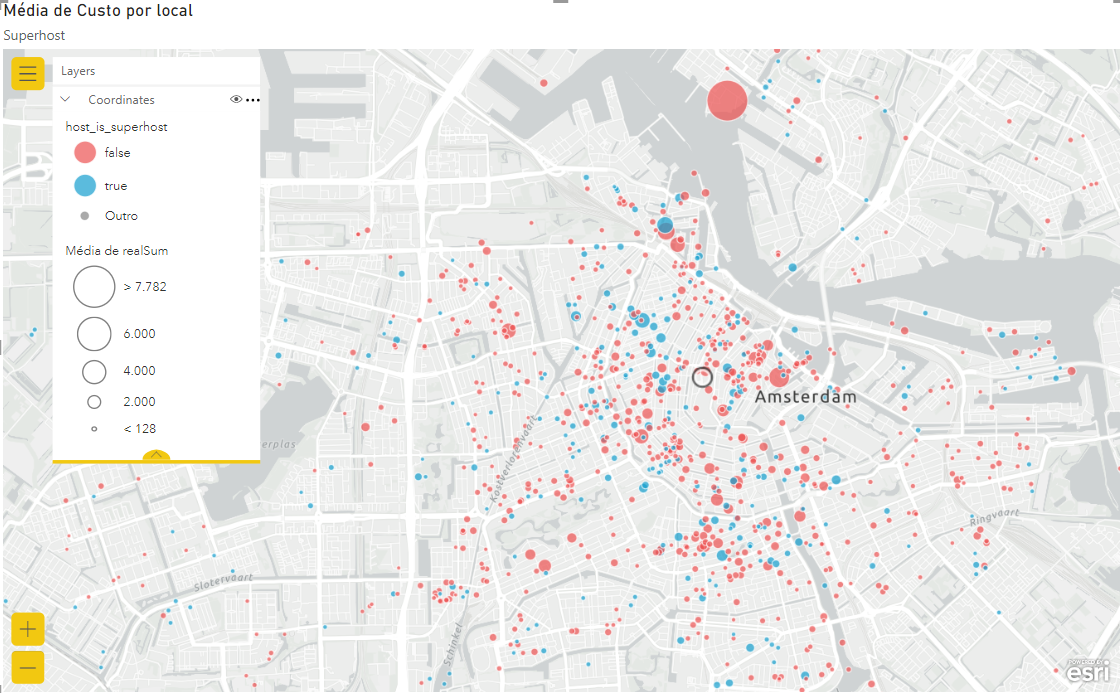

## **Melhores Airbnbs em Amsterdam**

In [57]:
# Locações mais bem avaliadas - dfotimo

color_mapping = {True: '#00A699', False: '#FF5A5F'}
fig = px.scatter_mapbox(dfotimo, lat='lat', lon='lon', size='custo', color='satisfacao', color_discrete_map=color_mapping, hover_name="tipo_quarto", custom_data=["tipo_quarto","negócio", "capacidade", "quartos","superhost"])

hover_text = '<b>Tipo de Quarto:</b> %{customdata[0]}<br>' \
             '<b>Negócio:</b> %{customdata[1]}<br>' \
             '<b>Capacidade:</b> %{customdata[2]}<br>' \
             '<b>Quartos:</b> %{customdata[3]}<extra></extra>'
fig.update_traces(hovertemplate=hover_text)

# Atualizar layout
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox_zoom=12,
    mapbox_center={'lat': 52.369, 'lon': 4.8938}, # Dam Square em Amsterdam
    title_text='Mapa dos Melhores Airbnbs em Amsterdam',
    title_font_size=28,
    title_x=0.5,
    title_y=0.95,
    showlegend=False
)

fig.show()

# **VISUALIZAÇÃO**

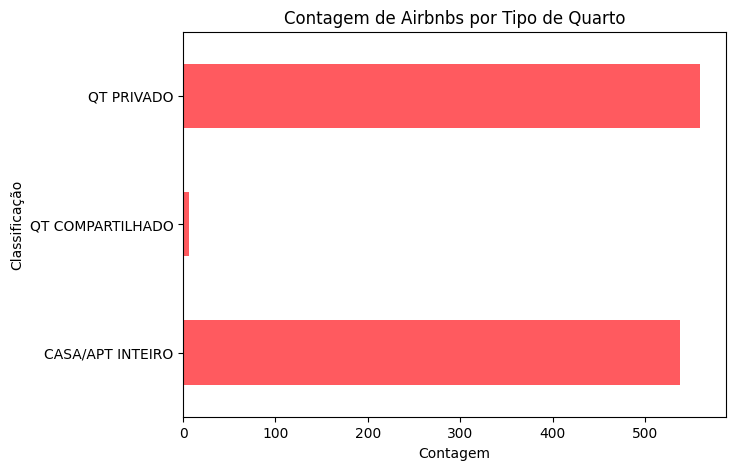

In [58]:
# Gráfico de barras horizontal
df.groupby(['tipo_quarto']).size().plot.barh(figsize=(7,5), color='#FF5A5F')
plt.xlabel('Contagem')
plt.ylabel('Classificação')
plt.title('Contagem de Airbnbs por Tipo de Quarto')
plt.show()

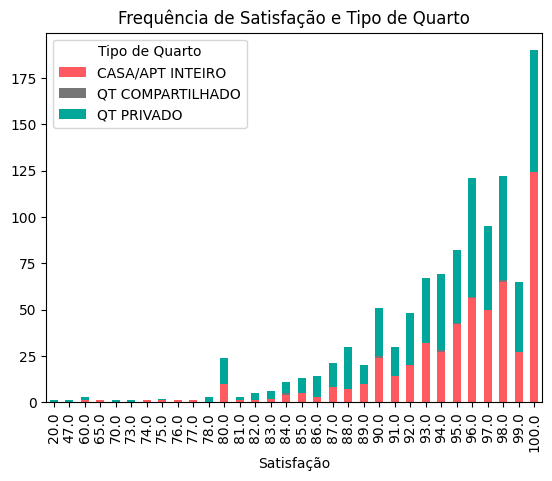

In [59]:
# Gráfico de barras empilhadas da contagem de ocorrências por 'uf' e 'classificacao':
colors = ['#FF5A5F','#767676','#00A699']
df.groupby(['satisfacao', 'tipo_quarto']).size().unstack().plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Satisfação')
plt.ylabel('')
plt.title('Frequência de Satisfação e Tipo de Quarto')
plt.legend(title='Tipo de Quarto')
plt.show()

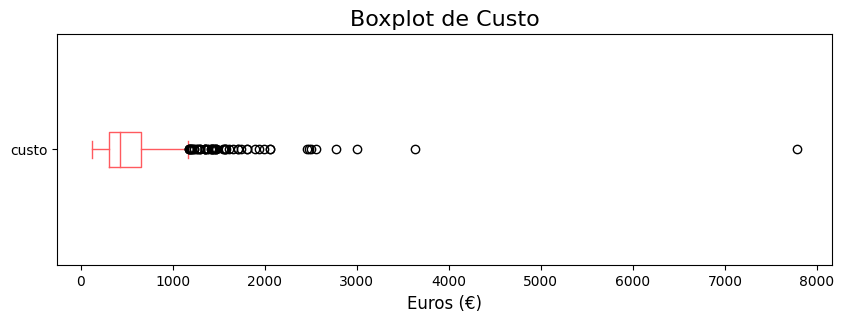

In [60]:
ax = df.plot.box(column="custo", figsize=(10, 3), vert=False,color='#FF5A5F')
ax.set_title("Boxplot de Custo",fontsize=16)
ax.set_xlabel('Euros (€)', fontsize=12)
plt.show()

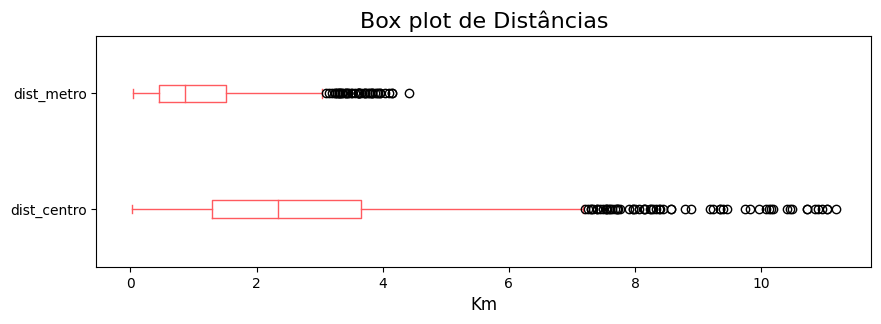

In [61]:
colunas_selecionadas = ['dist_centro', 'dist_metro']
novodf = df[colunas_selecionadas]

ax = novodf.plot.box(figsize=(10, 3), vert=False,color='#FF5A5F')
ax.set_xlabel('Km', fontsize=12)
ax.set_title('Box plot de Distâncias', fontsize=16)
plt.show()

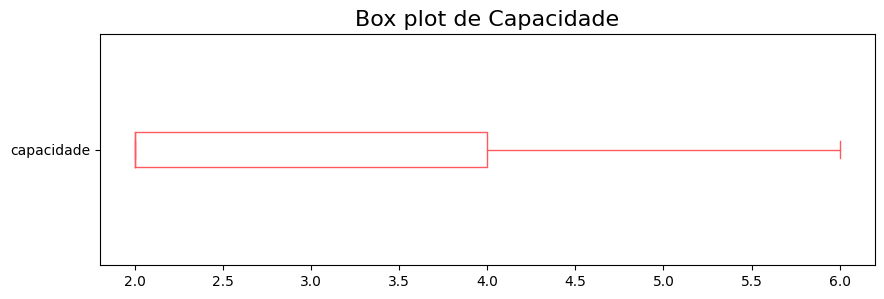

In [62]:
ax = df.plot.box(column="capacidade", figsize=(10, 3),vert=False,color='#FF5A5F')
ax.set_title('Box plot de Capacidade', fontsize=16)
plt.show()

In [63]:
fig = px.histogram(df, x="satisfacao",
                   title='Histograma de Satisfação',
                   opacity=0.8,
                   color_discrete_sequence=['#FF5A5F'],
                   range_x=[20, 100]
                   )
fig.show()

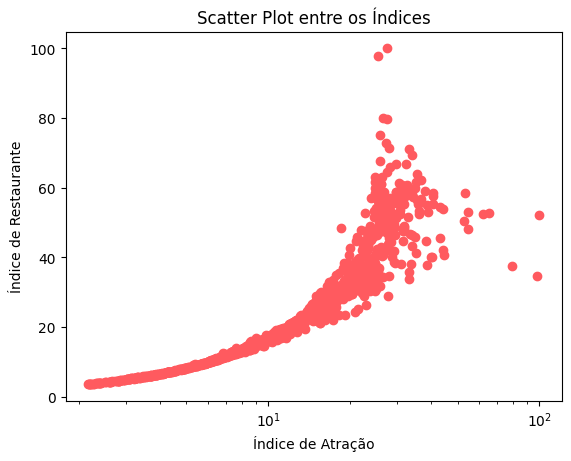

In [74]:
# Criar o scatter plot
plt.scatter(df.ind_atracao_norm,df.ind_rest_norm, color='#FF5A5F')

# Adicionar rótulo
plt.xlabel('Índice de Atração')
plt.ylabel('Índice de Restaurante')

plt.xscale('log')

# Adicionar título
plt.title('Scatter Plot entre os Índices')
plt.show()

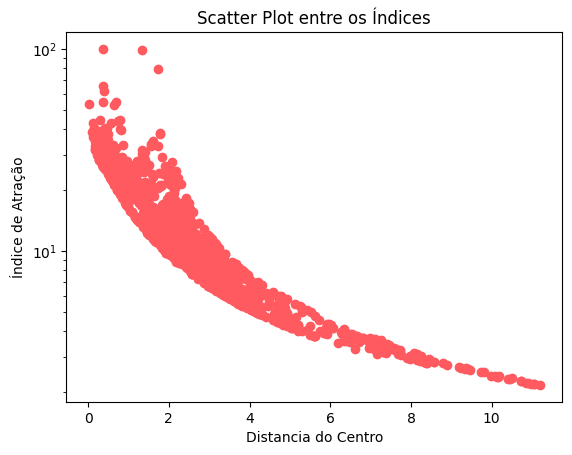

In [78]:
# Criar o scatter plot
plt.scatter(df.dist_centro,df.ind_atracao_norm, color='#FF5A5F')

# Adicionar rótulo
plt.xlabel('Distancia do Centro')
plt.ylabel('Índice de Atração')

plt.yscale('log')

# Adicionar título
plt.title('Scatter Plot entre os Índices')
plt.show()

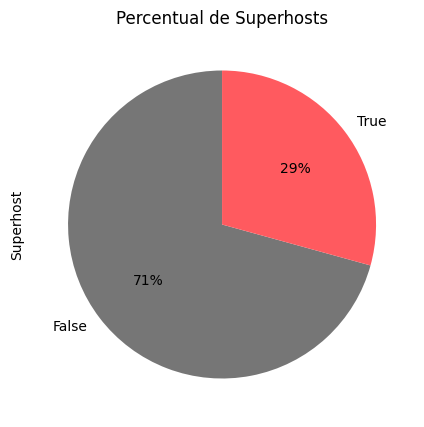

In [66]:
# Gráfico de Quantidade de Superhosts
colors = ['#767676', '#FF5A5F']
df.groupby(['superhost'],dropna=False).size().sort_values(ascending=False).plot(kind='pie',
                                                                                  ylabel= 'Superhost',
                                                                                  figsize=(7, 5),
                                                                                  autopct='%1.0f%%',
                                                                                  startangle=90,
                                                                                  colors=colors)
plt.title('Percentual de Superhosts')
plt.show()

# Conclusões da EDA (Análise Exploratória)

* **29%** das locações são Superhosts
* **49%** são Casas ou Apartamentos Inteiros
 * 50,6% é Quarto Privado e apenas 6 locações (0,5%) são Quartos Compartilhados.

* O **índice de atração** diminui , conforme a **distância do centro** aumenta, com uma correlação inversa de cerca de 70%.

* Vemos pelo Scatter Plot de Índices que **Atração** e disponibilidade de **restaurantes** perto tem uma correlação de aproximadamente 90%.

* Os airbnbs **mais bem avaliados** estão localizados mais próximos ao centro ou metrô, têm valores justos e taxa de limpeza alta.

* Os **mais caros** não necessariamente tem uma taxa de satisfação alta:
 * esses podem fazer modificações nos pontos chave para atrair mais visitantes, além de deixar o preço mais justo.



### Sugestão para algumas locações
* As locações de índice 626, 627 e 853, estão com valores de locação acima da média, poderiam rever as taxas e melhorar a limpeza do local para aumentar a satisfação que está abaixo de 80, enquanto a média das satisfações é de 94.4.

* Já as locações de índice 54, 388 e 981 possuem boas notas de limpeza, satisfação e atração, mas o índice de restaurantes é baixo, então o recomendado seria abaixar um pouco os valores para atrair mais hóspedes, checar a taxa de velocidade de resposta e ter a chance de se tornarem superhosts.

* De acordo com o site da Airbnb os benefícios de ser um superhost vão além do selo - "superhosts tem mais visibilidade e confiança dos hóspedes. O selo pode tornar o anúncio mais atraente, porque saberão que é um local conhecido pela excelente hospitalidade."

* **Outlier de custo:** Hotel com valor total de 7782.91.
* Sua taxa de limpeza é 10 e a satisfação é 100.

 O **Hotel Faralda** foi montado em um antigo guindaste a 50 metros de altura. Por isso o **custo** elevado, sendo visto como um outlier das outras hospedagens. Apesar de não ser Superhost, seu preço é bem superior a média, pela experiência proporcionada. Além dos quartos terem "2 andares, quarto e sala separados e decoração exclusiva, atrações como Bungee Jump, passeios privados de barco entre outros."

  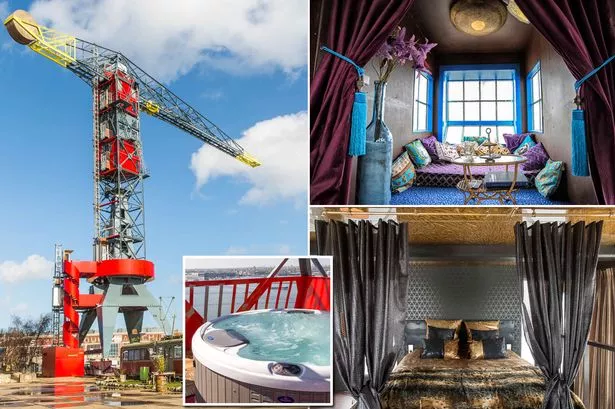

In [67]:
# Obrigada!🎁